In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [3]:
import skimage
from skimage.transform import resize

In [4]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [5]:
from glob import glob
import cv2
import matplotlib.pylab as plt

In [6]:
import random

In [7]:
from skimage.util import random_noise
import math

In [12]:
# Loading Caltech dataset as dataset
def loadBatchImages(path, nSamples, nVal):
    catlist=listdir(path)
    imagesTrain=[]
    labelsTrain=[]
    imagesVal=[]
    labelsVal=[]
    # for 256 categories it will take some time, use only 20 categories
    for cat in catlist[0:20]:
        deepPath=path+cat+"/"
        imagelist=listdir(deepPath)
        ind=0
        for images in imagelist[0:nSamples+nVal]:
            img=cv2.imread(deepPath+images)
#             img=img_to_array(img)
#             img=resize(img,(224,224))
            
            if ind<nSamples:
                labelsTrain.append(int(images[0:3])-1)
                imagesTrain.append(img)
            else:
                labelsVal.append(int(images[0:3])-1)
                imagesVal.append(img)
            ind+=1
    
    return imagesTrain, to_categorical(labelsTrain), imagesVal, to_categorical(labelsVal)

def shuffledSet(a,b):
    assert np.shape(a)[0]==np.shape(b)[0]
    p=np.random.permutation(np.shape(a)[0])
    return(a[p],b[p])

path="./caltech-256/256_ObjectCategories/"
nSamples=7
nVal=7
data, labels, dataVal, labelsVal=loadBatchImages(path, nSamples, nVal)
# data=preprocess_input(np.float64(data))
# dataVal=preprocess_input(np.float64(dataVal))
train=shuffledSet(np.asarray(data), labels)
val=shuffledSet(np.asarray(dataVal), labelsVal)
x_train=train[0]
y_train=train[1]
x_test=val[0]
y_test=val[1]

C:\Users\manali.biswas\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [13]:
print(len(x_train))

140


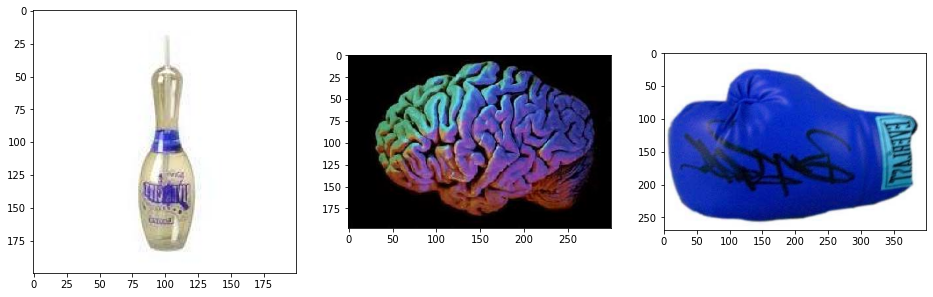

In [35]:
def plotNImages(images, n):
    r=list(images)[0:n]
    fig=plt.figure(figsize=(16,16))
    columns=3
    row=math.ceil(n/3)
    i=1
    for img in r:
        fig.add_subplot(row,columns,i)
        plt.imshow(img)
        i+=1
    
plotNImages(x_train, 3)

In [15]:
# Salt and Pepper Noise
def addSaltPepper(images):
    print("Salt and Pepper noise:")
    noisyImages=[]
    for img in images:
        noisy=random_noise(img, mode='s&p', amount=0.3)
        
        # The above function returns a floating-point image
        # on the range [0, 1], thus we changed it to 'uint8'
        # and from [0,255]
        
        noisy=np.array(255*noisy,dtype='uint8')
        noisyImages.append(noisy)
    return noisyImages

Salt and Pepper noise:


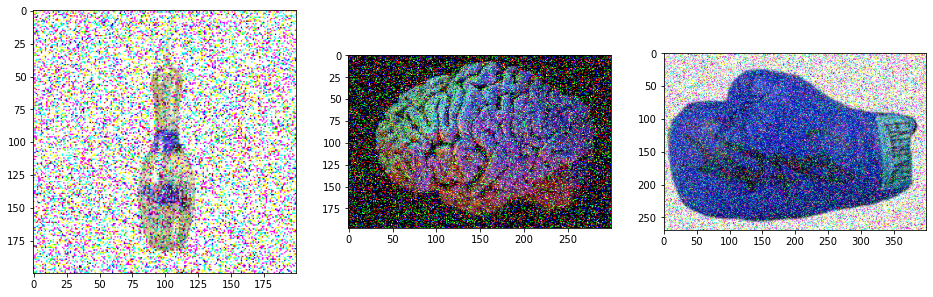

In [36]:
r=list(x_train)
saltPepperImages=addSaltPepper(r)
plotNImages(saltPepperImages, 3)

In [37]:
# Gaussian Noise

def addGaussian(images):
    print("Gaussian noise:")
    noisyImages=[]
    for img in images:
        gauss=np.random.normal(0,1,img.size)
        gauss=gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
        noisy=cv2.add(img,gauss)
        
        noisyImages.append(noisy)
        
    return noisyImages

Gaussian noise:


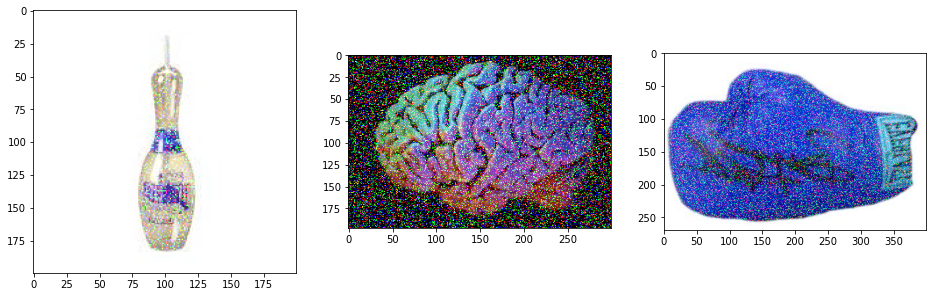

In [38]:
gaussianImages=addGaussian(r)
plotNImages(gaussianImages, 3)

In [39]:
# Speckle Noise

def addSpeckle(images):
    print("Speckle noise:")
    noisyImages=[]
    for img in images:
        noisy=random_noise(img,mode='speckle')
        noisyImages.append(noisy)
    return noisyImages

Speckle noise:


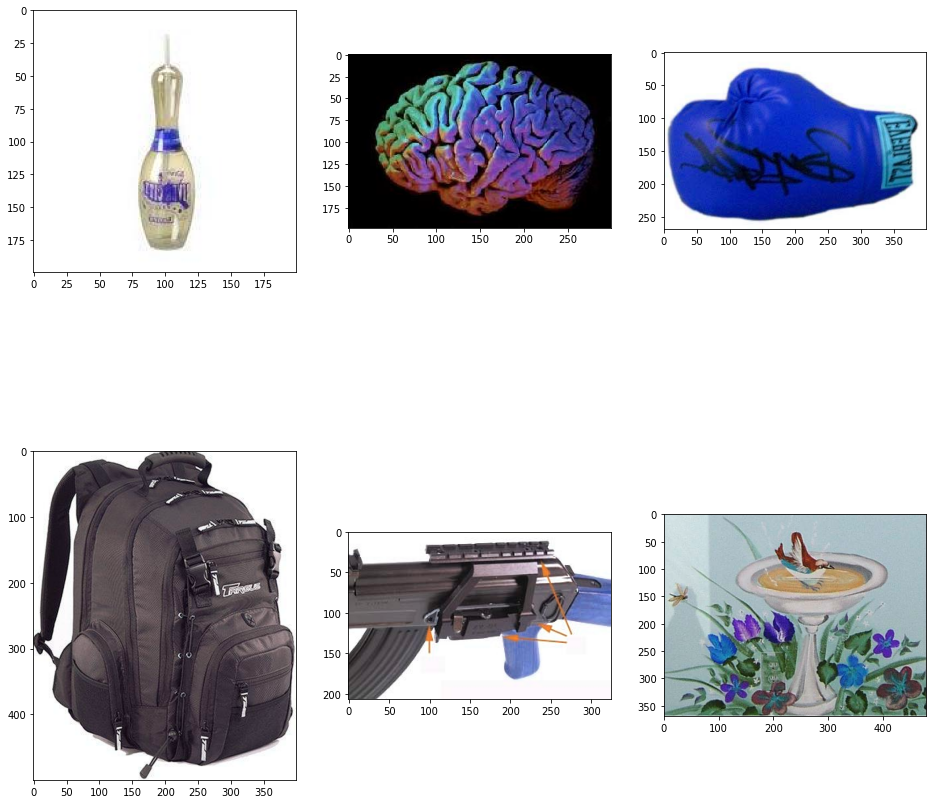

In [40]:
speckleImages=addSpeckle(r)
plotNImages(r,6)

In [41]:
# Add Possion Noise

def addPoisson(images):
    print("Speckle noise:")
    noisyImages=[]
    for img in images:
        noisy=random_noise(img, mode='poisson')
        
        noisyImages.append(noisy)
        
    return noisyImages

Speckle noise:


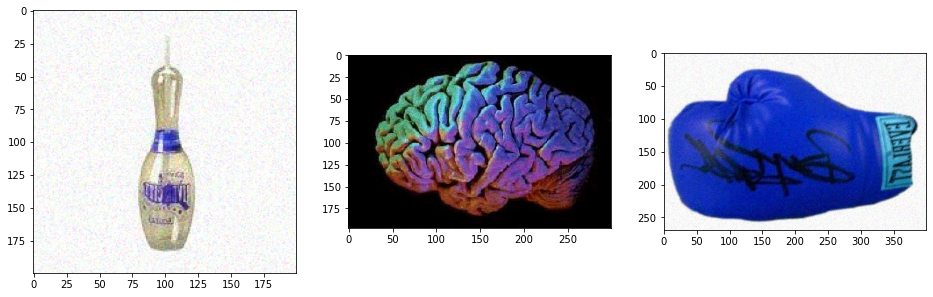

In [42]:
poissonImages=addPoisson(r)
plotNImages(poissonImages, 3)

In [ ]:
# Apply the noises to the caltech dataset (take limited samples)

In [ ]:
# Take pre-trained image classification models

In [ ]:
# Check accuracy

In [ ]:
# Check accuracy without noise

In [ ]:
# Remove image degradation and then check accuracy